In [32]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import image
import seaborn as sns
import cv2 as cv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import functools as f
from sklearn.model_selection import train_test_split
import splitfolders
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array 
import visualkeras

In [ ]:
import splitfolders
splitfolders.ratio('../Alzheimer_classification/Dataset', output="output", seed=1345, ratio=(.8, 0.1,0.1))

In [33]:
# Height and width in pixels
img_height = 128
img_width = 128

data_splits = []
direct = ['output/train', 'output/test', 'output/val']
for d in direct: 
    var_name = tf.keras.utils.image_dataset_from_directory(
                    d,
                    label_mode='categorical',
                    labels='inferred',
                    batch_size=64,
                    image_size=(img_height, img_width),
                    seed=123,
                )
    data_splits.append(var_name)
    

Found 5119 files belonging to 4 classes.
Found 961 files belonging to 4 classes.
Found 958 files belonging to 4 classes.


In [51]:
data_splits

[<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>]

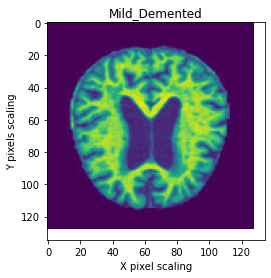

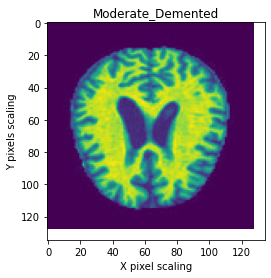

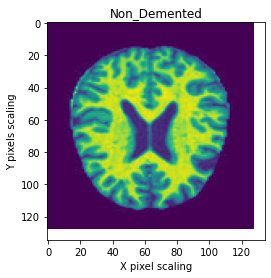

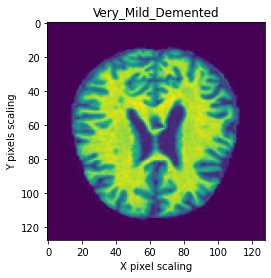

In [35]:
#Visualize images
dem_types = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']
examples = ['Mild_Demented/mild_2.jpg', 'Moderate_Demented/moderate_2.jpg', 'Non_Demented/non_2.jpg', 'Very_Mild_Demented/verymild_2.jpg']
for i in range(len(dem_types)): 
    plt.plot(128,128)
    plt.figure(i+1) 
    plt.title(dem_types[i])
    plt.xlabel("X pixel scaling")
    plt.ylabel("Y pixels scaling")
    plt.imshow(image.imread('Dataset/'+ examples[i]))
plt.show()

In [ ]:
# LeNet-5 CNN Architecture Modified (MaxPool and Dropout 25%)
model = keras.Sequential()
model.add(Rescaling(1./255, input_shape=(128, 128, 3)))
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation = 'relu', input_shape = (128, 128, 3), kernel_initializer="he_normal"))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation = 'relu', input_shape = (128, 128, 3), kernel_initializer="he_normal"))
model.add(layers.MaxPooling2D())

model.add(Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(units = 128, activation = 'relu', kernel_initializer="he_normal"))
model.add(layers.Dense(units = 64, activation = 'relu'))
model.add(layers.Dense(units = 4, activation = 'softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
visualkeras.layered_view(model)

In [ ]:
hist = model.fit(data_splits[0], epochs = 50, validation_data = data_splits[2])

In [ ]:
print("Accuracy - LeNet5 Architecture Modified")
plt.plot(hist.history['accuracy'],c='b',label='train - accuracy')
plt.plot(hist.history['val_accuracy'],c='r',label='validation - accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy - LeNet5 Architecture Modified')
plt.show()

print("\n\n")
print('Loss - LeNet5 Architecture Modified')
plt.plot(hist.history['loss'],c='orange',label='train - loss')
plt.plot(hist.history['val_loss'],c='g',label='validation - loss')
plt.legend(loc='upper right')
plt.title('Loss - LeNet5 Architecture Modified')
plt.show()

In [ ]:
model.evaluate(data_splits[1])

In [ ]:
model.save('LeNet-5e50Mod.h5')

In [ ]:
# 0.5 accuracy with a LeNet-5 architecture. Better than random guess, but can get something better
# Let's try same architecture but MaxPooling instead of AveragePooling

#LeNet-5 CNN Architecture (with MaxPooling)
model2 = keras.Sequential()
model2.add(Rescaling(1./255, input_shape=(128, 128, 3)))
model2.add(Conv2D(filters=6, kernel_size=(3, 3), padding='same', activation = 'relu', kernel_initializer="he_normal"))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation = 'relu', kernel_initializer="he_normal"))
model2.add(MaxPooling2D(pool_size=(2,2)))


model2.add(Dropout(0.20))

model2.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(units = 128, activation = 'relu', kernel_initializer="he_normal"))
model2.add(Dense(units = 64, activation = 'relu'))
model2.add(Dense(units = 4, activation = 'softmax'))

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
visualkeras.layered_view(model2)

In [ ]:
hist2 = model2.fit(data_splits[0], epochs = 50, validation_data = data_splits[2])

In [ ]:
print("Accuracy - LeNet-5 with MaxPooling")
plt.plot(hist2.history['accuracy'],c='b',label='train - accuracy')
plt.plot(hist2.history['val_accuracy'],c='r',label='validation - accuracy')
plt.legend(loc='lower right')
plt.show()

print("\n\n")
print('Loss - LeNet-5 with MaxPooling')
plt.plot(hist2.history['loss'],c='orange',label='train - loss')
plt.plot(hist2.history['val_loss'],c='g',label='validation - loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
model2.evaluate(data_splits[1])

In [ ]:
model2.save('LeNet-5Maxe50.h5')

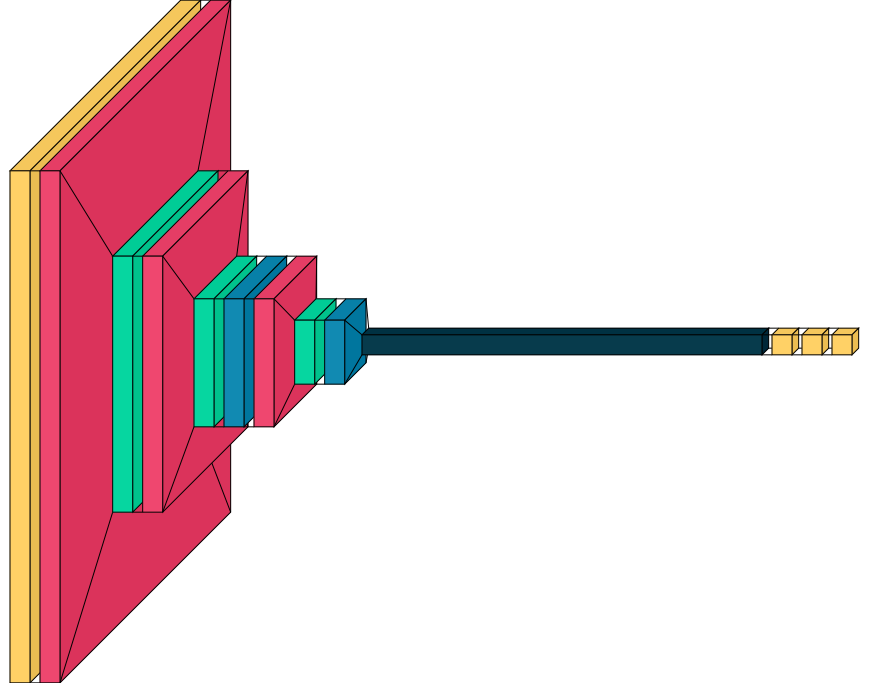

In [36]:
# New Architecture
model3 = Sequential()
model3.add(Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model3.add(Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model3.add(MaxPooling2D(pool_size=(2,2)))


model3.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Dropout(0.20))

model3.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(128,activation="relu",kernel_initializer="he_normal"))
model3.add(Dense(64,"relu"))
model3.add(Dense(4,"softmax"))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, weight_decay=1e-5)
model3.compile(loss="categorical_crossentropy", optimizer = optimizer,metrics=["accuracy"])
visualkeras.layered_view(model3)

In [37]:
hist3 = model3.fit(data_splits[0], epochs = 15, validation_data = data_splits[2])

Epoch 1/10
80/80 [==============================] - 40s 478ms/step - loss: 1.3640 - accuracy: 0.4739 - val_loss: 1.0624 - val_accuracy: 0.5021
Epoch 2/10
80/80 [==============================] - 40s 488ms/step - loss: 0.9637 - accuracy: 0.5267 - val_loss: 0.9908 - val_accuracy: 0.5752
Epoch 3/10
80/80 [==============================] - 51s 634ms/step - loss: 0.8959 - accuracy: 0.5595 - val_loss: 0.8820 - val_accuracy: 0.6326
Epoch 4/10
80/80 [==============================] - 57s 704ms/step - loss: 0.8349 - accuracy: 0.6029 - val_loss: 0.7561 - val_accuracy: 0.6775
Epoch 5/10
80/80 [==============================] - 58s 718ms/step - loss: 0.7477 - accuracy: 0.6652 - val_loss: 0.6735 - val_accuracy: 0.7223
Epoch 6/10
80/80 [==============================] - 54s 669ms/step - loss: 0.6789 - accuracy: 0.6964 - val_loss: 0.5707 - val_accuracy: 0.7745
Epoch 7/10
80/80 [==============================] - 48s 601ms/step - loss: 0.6129 - accuracy: 0.7285 - val_loss: 0.4789 - val_accuracy: 0.8236

Accuracy - CNN Model


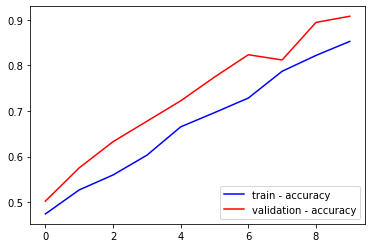




Loss - CNN Model


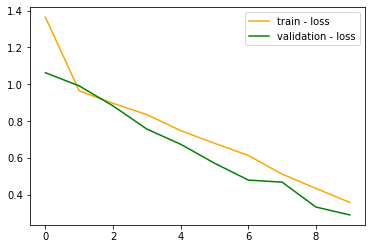

In [38]:
print("Accuracy - CNN Model")
plt.plot(hist3.history['accuracy'],c='b',label='train - accuracy')
plt.plot(hist3.history['val_accuracy'],c='r',label='validation - accuracy')
plt.legend(loc='lower right')
plt.show()

print("\n\n")
print('Loss - CNN Model')
plt.plot(hist3.history['loss'],c='orange',label='train - loss')
plt.plot(hist3.history['val_loss'],c='g',label='validation - loss')
plt.legend(loc='upper right')
plt.show()

In [52]:
model3.evaluate(data_splits[1])

16/16 [==============================] - 4s 212ms/step - loss: 0.3179 - accuracy: 0.9032


[0.3178884983062744, 0.9032257795333862]

In [40]:
model3.save('CNN_Model.h5')

In [41]:
cnn = load_model('CNN_Model.h5')
img = load_img("output/test/Very_Mild_Demented/verymild_1737.jpg")
img = img.resize((128, 128))
img = img_to_array(img) 

img = img.reshape(-1,128, 128,3)

print(img.shape)

(1, 128, 128, 3)


In [42]:
print(np.argmax(cnn.predict(img)))

1/1 [==============================] - 0s 87ms/step
3


In [80]:
preds = np.array([])
labels =  np.array([])
for x, y in data_splits[1]:
    preds = np.concatenate([preds, np.argmax(cnn.predict(x), axis = -1)])
    labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

1/1 [==============================] - 0s 22ms/step


In [81]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

print("Accuracy:",metrics.accuracy_score(labels, preds))
print("Sensitivity:",metrics.recall_score(labels, preds, average='macro'))
print("Precision:",metrics.precision_score(labels, preds, average='macro', zero_division=1))
print("Recall:",metrics.recall_score(labels, preds, average='macro' ))
print("F1 Score:",f1_score(labels, preds, average='macro'))

Accuracy: 0.9032258064516129
Sensitivity: 0.9322337962962963
Precision: 0.9332361298487327
Recall: 0.9322337962962963
F1 Score: 0.9314654117625508


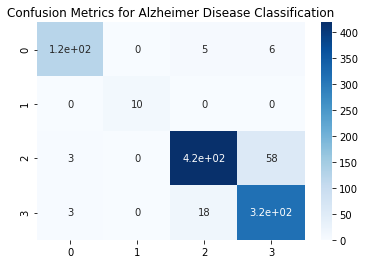

In [82]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

Cm=confusion_matrix(labels, preds)
ax=plt.axes()
sns.heatmap(Cm, cmap='Blues' ,annot=True,
           annot_kws={'size':10},
           ax=ax
           )

plt.title("Confusion Metrics for Alzheimer Disease Classification")
plt.show()